In [2]:
import matplotlib.pyplot as plt
import cv2 #openCV

In [3]:
cloudy= cv2.imread('E:/AtomCamp-DataScience/Python/Deep Learning/POrtfolio Project/dataset/train/cloudy/cloudy5.jpg')


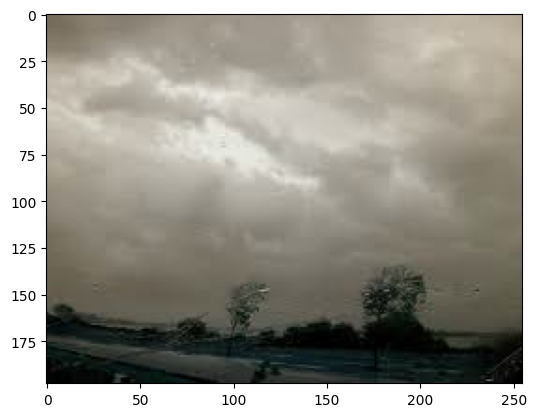

In [4]:
plt.imshow(cloudy)

In [5]:
cloudy_rgb= cv2.cvtColor(cloudy, cv2.COLOR_BGR2RGB)

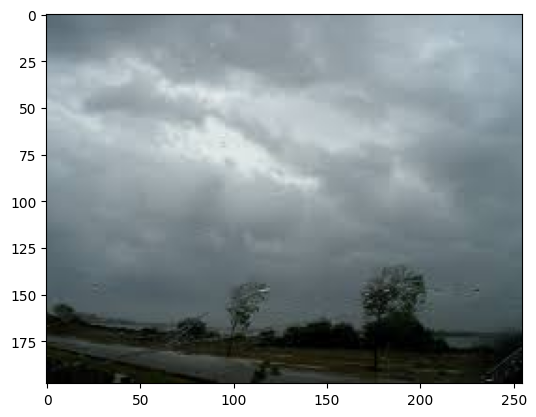

In [6]:
plt.imshow(cloudy_rgb)

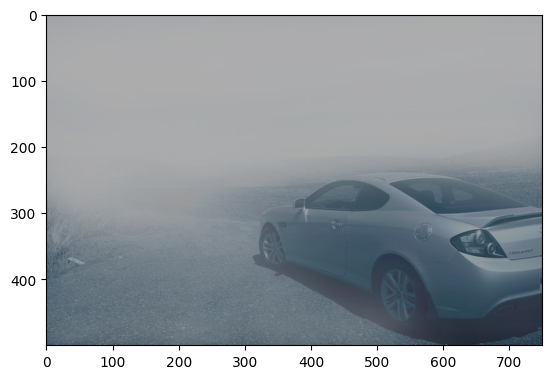

In [7]:
foggy= cv2.imread('dataset/train/foggy/foggy5.jpg')
foggy_rgb= cv2.cvtColor(foggy, cv2.COLOR_BGR2RGB)
plt.imshow(foggy_rgb)

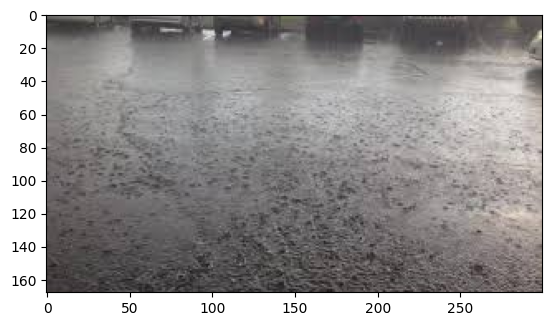

In [8]:
rainy= cv2.imread('dataset/train/rainy/rain5.jpg')
rainy_rgb= cv2.cvtColor(rainy, cv2.COLOR_BGR2RGB)
plt.imshow(rainy_rgb)

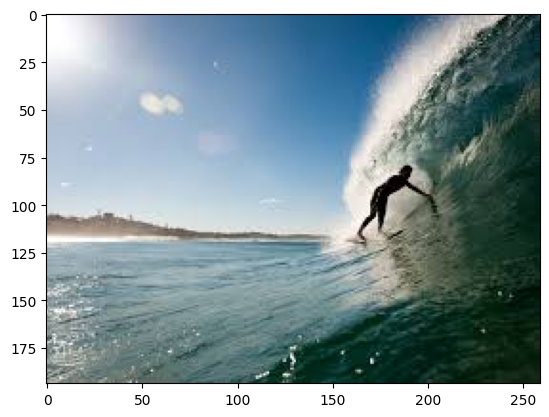

In [9]:
shine= cv2.imread('dataset/train/shine/shine7.jpg')
shine_rgb= cv2.cvtColor(shine, cv2.COLOR_BGR2RGB)
plt.imshow(shine_rgb)

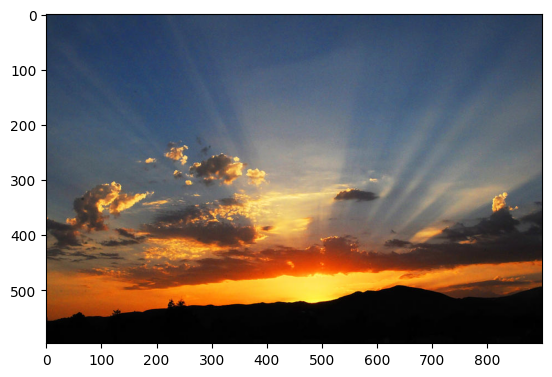

In [10]:
sunrise= cv2.imread('dataset/train/sunrise/sunrise4.jpg')
sunrise_rgb= cv2.cvtColor(sunrise, cv2.COLOR_BGR2RGB)
plt.imshow(sunrise_rgb)

## Shape

In [11]:
sunrise.shape

(597, 900, 3)

In [12]:
foggy.shape

(500, 750, 3)

In [13]:
shine.shape

(194, 259, 3)

# Preparing the Data for the Model

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
image_gen= ImageDataGenerator(rotation_range=30, #Rotation of Image
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

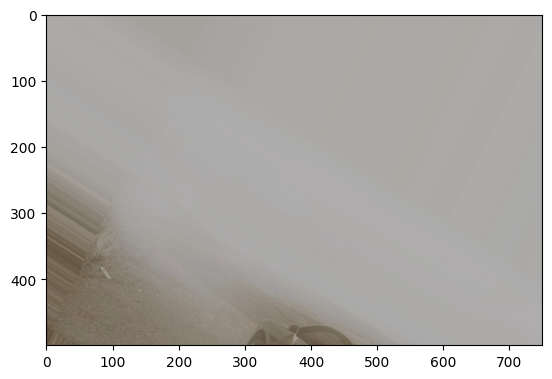

In [16]:
plt.imshow(image_gen.random_transform(foggy))

# Making a flow (Pipeline)

In [17]:
train_img = image_gen.flow_from_directory('dataset/train')

Found 1200 images belonging to 5 classes.


In [18]:
test_img = image_gen.flow_from_directory('dataset/test')

Found 300 images belonging to 5 classes.


In [19]:
train_img.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

In [20]:
test_img.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

# Building the Model

In [21]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [22]:
model= Sequential()

# First Conv Layer 
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third layer 
model.add(Conv2D(filters=40, kernel_size=(5,5), activation='silu'))
model.add(Conv2D(filters=65, kernel_size=(8,8), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Dense Layers
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #Regularization Techniques

#Output Layer (Cat=0 Dog=1)
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 40)        64040     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 65)        1

# Training the Model

In [25]:
train_image_gen = image_gen.flow_from_directory('dataset/train',
                                               target_size=(150,150),
                                               batch_size=16,
                                               class_mode='categorical')

Found 1200 images belonging to 5 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory('dataset/test',
                                               target_size=(150,150),
                                               batch_size=16,
                                               class_mode='categorical')

Found 300 images belonging to 5 classes.


In [28]:
train_image_gen.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=75,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
75/75 [==============================] - 235s 3s/step - loss: 0.5018 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 2/100
75/75 [==============================] - 233s 3s/step - loss: 0.5018 - accuracy: 0.8000 - val_loss: 0.5006 - val_accuracy: 0.8000
Epoch 3/100
75/75 [==============================] - 239s 3s/step - loss: 0.5016 - accuracy: 0.8000 - val_loss: 0.5009 - val_accuracy: 0.8000
Epoch 4/100
75/75 [==============================] - 219s 3s/step - loss: 0.5017 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 5/100
75/75 [==============================] - 179s 2s/step - loss: 0.5016 - accuracy: 0.8000 - val_loss: 0.5008 - val_accuracy: 0.8000
Epoch 6/100
75/75 [==============================] - 177s 2s/step - loss: 0.5018 - accuracy: 0.8000 - val_loss: 0.5010 - val_accuracy: 0.8000
Epoch 7/100
75/75 [==============================] - 189s 3s/step - loss: 0.5016 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 

In [36]:
model.save('weather_classification.h5')

# Evaluating the Model

In [37]:
results.history['accuracy']

[0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,
 0.799999475479126,


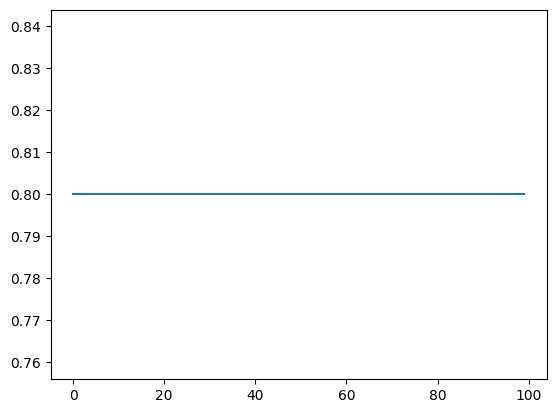

In [39]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [40]:
train_image_gen.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

In [41]:
import numpy as np
from keras.preprocessing import image

cloudy_file = 'dataset/train/cloudy/cloudy5.jpg'

cloudy_img = image.load_img(cloudy_file, target_size=(150, 150))

cloudy_img = image.img_to_array(cloudy_img)

cloudy_img = np.expand_dims(cloudy_img, axis=0)
cloudy_img = cloudy_img/255

In [42]:
prediction_prob = model.predict(cloudy_img)

1/1 [==============================] - 1s 594ms/step


In [43]:
# Output prediction
print(f'Probability that image is a cloudy is: {prediction_prob} ')

Probability that image is a cloudy is: [[0.20055926]] 


In [44]:
from keras.models import load_model
new_model= load_model('weather_classification.h5')

In [45]:
from keras.preprocessing import image

cloudy_file = 'dataset/test/cloudy/cloudy8.jpg'

In [47]:
cloudy_img = image.load_img(cloudy_file, target_size=(150, 150))

In [48]:
cloudy_img = image.img_to_array(cloudy_img)

cloudy_img.shape

(150, 150, 3)

In [50]:
import numpy as np
cloudy_img = np.expand_dims(cloudy_img, axis=0)
#only run once

In [51]:
cloudy_img.shape

(1, 150, 150, 3)

In [52]:
cloudy_img = cloudy_img/255

In [53]:
prediction_prob = new_model.predict(cloudy_img)

print(prediction_prob)

1/1 [==============================] - 0s 312ms/step
[[0.20055926]]


In [54]:
predictions = new_model.predict(cloudy_img)
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

1/1 [==============================] - 0s 82ms/step
[0]


In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess your test image (adjust the path accordingly)
img_path = 'dataset/test/cloudy/cloudy8.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Use the model to make predictions (assuming `new_model` has 5 output classes)
predictions = new_model.predict(img)

# Get the index of the highest prediction (the predicted class)
predicted_class = np.argmax(predictions, axis=1)[0]

# Define the class labels (update these based on your 5 classes)
class_labels = ['cloudy', 'foggy', 'sunrise', 'rainy', 'shine']  # Replace with your actual labels

# Print the predicted class label
print(f"Predicted class: {class_labels[predicted_class]}")


1/1 [==============================] - 0s 77ms/step
Predicted class: cloudy


# Applying VGG16

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=5,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)


Found 1200 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


Epoch 1/5
75/75 [==============================] - 1881s 25s/step - loss: 0.6237 - accuracy: 0.7710 - val_loss: 0.5022 - val_accuracy: 0.8000
Epoch 2/5
75/75 [==============================] - 1615s 22s/step - loss: 0.5103 - accuracy: 0.8000 - val_loss: 0.5012 - val_accuracy: 0.8000
Epoch 3/5
75/75 [==============================] - 1513s 20s/step - loss: 0.5096 - accuracy: 0.8000 - val_loss: 0.5017 - val_accuracy: 0.8000
Epoch 4/5
75/75 [==============================] - 1311s 18s/step - loss: 0.5103 - accuracy: 0.8000 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 5/5
19/19 [==============================] - 309s 16s/step - loss: 0.5009 - accuracy: 0.8000
Test accuracy: 0.8000001311302185
